# Fundamentals of Data Science
Winter Semester 2021 \
Homework 1
## Andrei Caraman, Simone Piperno, Leonardo Skerl, Gianmarco Ursini
caraman.1664744@studenti.uniroma1.it, piperno.1792917@studenti.uniroma1.it, skerl.1802968@studenti.uniroma1.it, ursini.1635956@studenti.uniroma1.it

## Exercise 1: Image Filtering and Object Identification

In this exercise you will first familiarise yourself with the basic image filtering routines of Python and NumPy (**Question 1**), then develop a simple image querying system which accepts a query image as input and then finds a set of similar images in the database (**Question 2, 3 and 4**).

This notebook consists of essential functions to solve assignment and questions to be implemented; your task is to fill the missing code "YOUR CODE HERE" part corresponding to each subproblem and produce brief reports on the results whenever necessary.

The filtering part contains two images: *graph.png* and *brick_aliasing.jpg*, which we will use for testing purposes.

In the identification part, you will compare images with several distance functions and evaluate their performance in combination with different image representations. The identification part contains query and model images
for the evaluation, which correspond to the same set of objects photographed from different viewpoints. The files model.txt and query.txt contain lists of image files arranged so that i-th model image depicts the same object as i-th query image. The placeholder scripts will also be used to test your solution.

As part of the exercise, provide an answer to questions in this notebook, in a report-like manner. After you have implemented all the missing code in both exercise parts, you should be able to execute those without errors. Use those to support your answers in the report answers.

The completed exercise should be handed in as a single notebook file. Use Markdown to provide equations. Use the code sections to provide your scripts and the corresponding plots.
Submit it by sending an email to galasso@di.uniroma1.it, damely@di.uniroma1.it, rahman@di.uniroma1.it and alessiosampieri27@gmail.com by Wednesday October 20th, 23:59.


## Question 1: Image Filtering **(9 Points)**

Import some useful libraries

In [2]:
## import packages
import numpy as np
from PIL import Image
from scipy.signal import convolve2d as conv2, convolve
import matplotlib.pyplot as plt
import cv2
import math
from math import sqrt
from numpy import exp
plt.rcParams["figure.figsize"] = (20,8)

In [3]:
def rgb2gray(rgb):
  '''
  RGB -> gray_scale
  '''
  r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
  gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
  return gray

### Exercise 1 - Code **(7 Points)**

#### Exercise 1.a **(3 Points)**


##### 1-D Gaussian Filter
Implement a method which computes the values of a 1-D Gaussian *Gx* for a given standard deviation $\sigma$ :
\begin{equation}
G=\frac{1}{\sqrt{2\pi}\sigma}\exp(-\frac{x^2}{2\sigma^2})
\end{equation}

The method should also return a vector *x* of values on which the Gaussian filter is defined: integer values on the interval $\left[-3\sigma,3\sigma\right]$.

This should be the output with $\sigma=3$.


![](https://drive.google.com/uc?export=view&id=1Q3WIdozsroKzinnlyZhgZHFMdYj7KQrw)


In [4]:
def gauss(sigma):
  """
  Gauss function taking as argument the standard deviation sigma
  The filter should be defined for all integer values x in the range [-3sigma,3sigma]
  The function should return the Gaussian values Gx computed at the indexes x
  """
  x = np.arange((-3 * sigma), (3 * sigma + 1))
  Gx = (np.sqrt(2 * np.pi) * sigma)**(-1) * np.exp( -(x**2) / (2 * sigma**2))
  return Gx, x

################# Do not write below this line just run #################

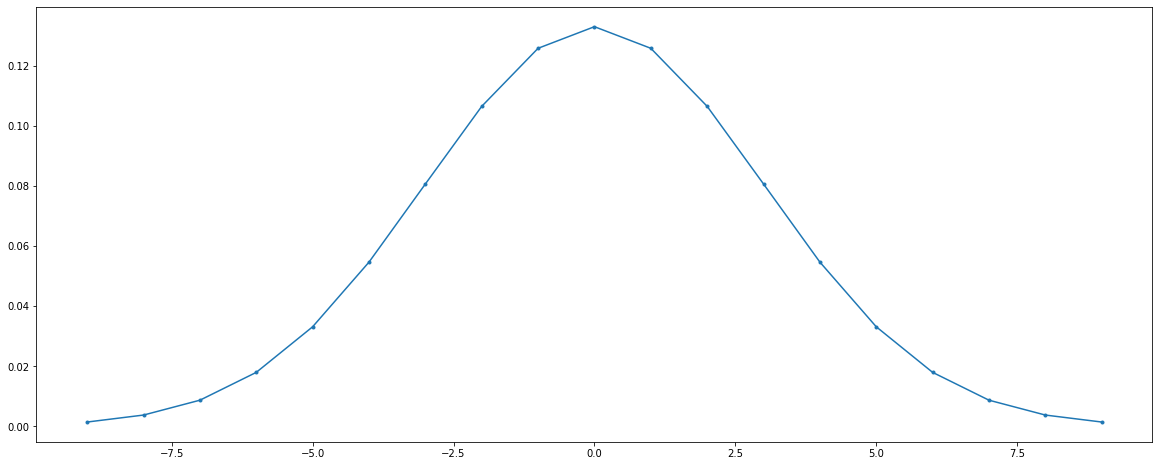

In [5]:
## function gauss
sigma = 3
Gx,x = gauss(sigma)
plt.figure(1)
plt.plot(x, Gx, '.-')
plt.show()

##### 1-D Box Filter

Implement a method which computes the values of a 1-D Box *Bx* for a given standard deviation $\sigma$ :
\begin{equation}
B= [\frac{1}{n},\frac{1}{n},\dots,\frac{1}{n}]\in \mathbb{R}^n 
\end{equation}

The method should also return a vector *x* of values on which the **Box** filter is defined: integer values on the interval $\left[-3\sigma,3\sigma\right]$.

An example of Box Filter:

![](https://drive.google.com/uc?export=view&id=1UBpSRYNkZnK2UGmGsMSnrmzwrPyMt6Fz)

In [6]:
def box(filter_size=3,show_verbose=False):
    """
    box function taking as argument the filter size.
    The filter should be defined for all integer values and centered at zero
    The function should return the Box values Bx computed at the indexes x
    """
    x = np.arange((-3 * sigma), 3 * sigma)
    Bx = [3**(-1) for i in range(len(x))]
    return Bx,x

################# Do not write below this line just run #################

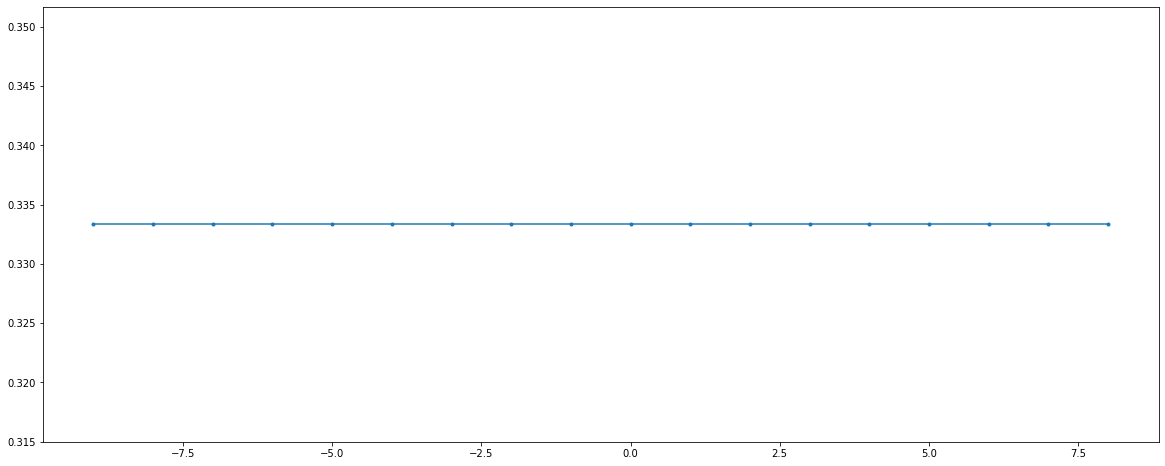

In [7]:
## function box
size = 3
Bx,x = box(size)
plt.figure(1)
plt.plot(x, Bx, '.-')
plt.show()

##### 2-D custom filter
Recreate the given 3x3 filter:

\begin{bmatrix}
-0.015 & -0.035 & -0.015\\
-0.035 & 0.8 &  -0.035 \\
-0.015 & -0.035 & -0.015
\end{bmatrix}

 The absolute value of the elements in the kernel sum to 1, in the middle position we find 80% of the weights and in the corners 30% of the remaining percentage with negative sign.

In [8]:
def custom():
  """
  This function returns the shown kernel.
  """
  Gx = np.array([[-.015, -.035, -.015],
                [-.035, .8, -.035],
                [-.015, -.035, -.015]])
  return Gx

################# Do not write below this line just run #################

In [9]:
custom_filter = custom()
print(custom_filter)

[[-0.015 -0.035 -0.015]
 [-0.035  0.8   -0.035]
 [-0.015 -0.035 -0.015]]


##### Gauss derivative 1-D
Implement a function gaussdx for creating a Gaussian derivative filter in 1D:
$$
\frac{d}{dx}G =-\frac{1}{\sqrt{2\pi}\sigma^3}x\exp({-\frac{x^2}{2\sigma^2}})
$$
As in 1.a-1.b, the function should also return a vector x of values on which the Gaussian derivative filter is
defined: integer values on the interval $[3\sigma; 3\sigma]$.

An example of Gauss derivative 1-D:

![](https://drive.google.com/uc?export=view&id=1QZmVMxJiOARKe5MoqzZ7SSSjFikoY2ty)

In [10]:
def gaussdx(sigma):

  x = np.arange((-3 * sigma), (3 * sigma + 1))
  Dx = (-np.sqrt(2 * np.pi) * sigma**3)**(-1) * x * np.exp( -(x**2) / (2 * sigma**2))

  return Dx, x

################# Do not write below this line just run #################

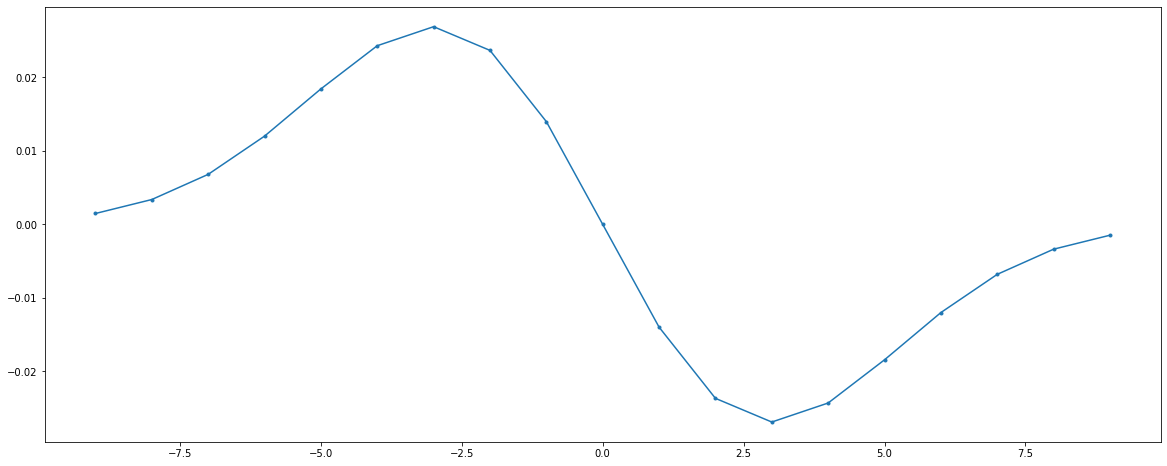

In [11]:
## function gaussdx
sigma = 3
DGx,x = gaussdx(sigma)
plt.figure(1)
plt.plot(x, DGx, '.-')
plt.show()

#### Exercise 1.b **(3 Points)**

Here you have to convolve the filters you have just defined with the given image _'graf.png'_. Remember that "Box" and "Gaussian" filters are separable.

##### 2-D Gaussian filter
The function should take an image as an input
and return the result of convolution of this image with 2D Gaussian kernel. You can take advantage of the Python’s convolve2D function if you don’t want to
implement convolution yourself.

See figure below for illustration
of Gaussian filtering. 
![](https://drive.google.com/uc?export=view&id=1GtsTZXlnj811pJi1VnamdtDCvhqHiu8j)



In [12]:
def gaussfiltering(img, sigma):
    """
    Implement a 2D Gaussian filter, leveraging the previous gauss.
    Implement the filter from scratch or leverage the convolve or convolve2D methods (scipy.signal)
    Leverage the separability of Gaussian filtering
    Input: image, sigma (standard deviation)
    Output: smoothed image
    """ 
    Gx, _ = gauss(sigma)
    
    
    F = Gx.reshape((1, -1)) 
    smooth_img = convolve(img, F)
    smooth_img = convolve(smooth_img, F.transpose())

    return np.array(smooth_img)

################# Do not write below this line just run #################

In [13]:
img = rgb2gray(np.array(Image.open('graf.png')))
smooth_img = gaussfiltering(img, 5)
#print(smooth_img.shape)
plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Gaussian Filtered Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.show()

FileNotFoundError: ignored

##### 2-D Box filter
The function should take an image as an input
and return the result of convolution of this image with 2D Box kernel. 

See figure below for illustration of Box filtering.

![Original Image](https://drive.google.com/uc?export=view&id=1IMrJUuTouVHmaiiyWB6H1QbKLzYTg9qC)



In [ ]:
def boxfiltering(img, filter_size):
    """
    Implement a 2D Box filter, leveraging the previous box.
    Leverage the separability of Box filtering
    Input: image, filter_size
    Output: smoothed image
    """

    F = np.array([[1 / filter_size for i in range(filter_size)]])
    smooth_img = conv2(img, F)
    smooth_img = conv2(smooth_img, F.transpose())

    return np.array(smooth_img)

################# Do not write below this line just run #################

In [ ]:
img = rgb2gray(np.array(Image.open('graf.png')))
smooth_img = boxfiltering(img, 20)
plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Box Filtered Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.show()

##### Custom Filter

The function should take an image and return the result of the convolution of this image with the custom filter we have defined in exercise 1.a.

See figure below for an illustration of this custom filter.

![](https://drive.google.com/uc?export=view&id=1N1wEkhqOuAX3TusQNNxN9KPOXb9nRsFn)



In [ ]:
def customfiltering(img):
    """
    Implement a 2D Custom filter
    Implement the filter from scratch 
    Input: image
    Output: smoothed image
    """
    F = np.array([[-.015, -.035, -.015],
                [-.035, .8, -.035],
                [-.015, -.035, -.015]])
    
    
    smooth_img = conv2(img, F)

    return np.array(smooth_img)

################# Do not write below this line just run #################

In [ ]:
img = rgb2gray(np.array(Image.open('graf.png')))
smooth_img = customfiltering(img)
#print(smooth_img.shape)
plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Custom Filtered Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.show()

#### Exercise 1.c **(1 Points)**

Implement a Gaussian Pyramid: Write a function for downscaling (you can use the function [resize from cv2](https://docs.opencv.org/master/dd/d52/tutorial_js_geometric_transformations.html) library) and use the Gaussian filter to blur it. The Pyramid must consist of three steps: 

* Apply Gaussian filter on original Image
* Resize (Downscale) the smoothed image (obtained from previous step) and apply Gaussian filter again.
* Resize (Downscale) the smoothed image (obtained from previous step) and apply Gaussian filter again.

See figure below for an illlustration of Gaussian Pyramid.
![](https://drive.google.com/uc?export=view&id=1JKeyNozWgoBWHqrUwj4SEF6SJEnO9uMt)


In [ ]:
def downscale(img, factor):
    '''
    This function should return the given image
    resized by the factor.
    Input:
    img: the image to resize
    factor: the factor you want use to downscale
    Output:
    resized: the resized image
    '''
    
    width = round(len(img[0]) * factor)
    height = round(len(img) * factor)
    dim = (width, height)
    
    image_resize = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    return image_resize

In [ ]:
def GaussianPyramid(img, steps=3, factor=0.5, sigma=4):
    '''
    This function implements the Gaussian Pyramid and shows the results.
    Leverage the "downscale" function.

    Inputs:
    img: the image
    steps: number of steps to use in performing the Pyramid
    factor: the scaling factor to resize the image at each step
    sigma: the Gaussian filter parameter

    Output:
    --
    '''
    width = round(len(img[0]))
    height = round(len(img))
    
    smooth_img = gaussfiltering(img, sigma)
    
    plt.figure()
    plt.subplot(121)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255) 
    plt.subplot(122)
    plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255) 
    plt.show()
    for i in range(2, 4):
        width, height = plt.figaspect(factor)
        scaled_img = downscale(smooth_img, factor)
        smooth_img = gaussfiltering(scaled_img, sigma)
        plt.figure(figsize=(width, height))
        plt.subplot(1, i**2, 1)
        plt.imshow(scaled_img, cmap='gray', vmin=0, vmax=255) 
        plt.subplot(1, i**2, 2)
        plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255) 
        plt.show()
        
    return

################# Do not write below this line just run #################

In [ ]:
img = rgb2gray(np.array(Image.open('graf.png')))
GaussianPyramid(img)

### Exercise 1 - Report **(2 Points)**

Use the images from the previous exercises to write a report on what you learned about filters and convolutions **(in the text block below)**.
In report, you should also compare your results: use the three filters you just created and apply on 'brick_aliasing.jpg' file and identify which filter is applied on Image A, Image B and Image C illustrated in Figure below. Use 7 as filter_size both for Gaussian and Box filter.

![](https://drive.google.com/uc?export=view&id=1eDOTU7FIRht9WMiAeW3ZlsFnpAlW_ZGm)

**Write your Report here**
 

- Image A filter -> Gaussian filter 
- Image B filter -> Box filter
- Image C filter -> Custom filter

Image filtering was implemented through the use of convolution.\
Convolution is a multi step operation between the input image and a kernel.\
The kernel is an array whose values rapresent the filter type, e.g. the box filter contains all equal values.

This technique aims at extracting patterns or reducing the noise modifing the image information through specifc kernels.

## Question 2: Identification **(10 Points)**

Import some useful libraries

In [14]:
## import packages
import numpy as np
from PIL import Image
from numpy import histogram as hist
import matplotlib.pyplot as plt

In [15]:
def rgb2gray(rgb):
  r, g, b = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
  gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
  return gray

### Exercise 2 - Code

#### Exercise 2.a **(3 Points)**
For this question,  implement the
function **normalized hist**, which takes gray-value image as input and returns normalized histogram of
pixel intensities. When quantizing the image to compute the histogram, consider that pixel intensities
range in $[0, 255]$.
Compare your implementation with built-in Python function numpy.histogram. Your histograms and
histograms computed with Python should be approximately the same. (3 points)

In [16]:
def normalized_hist(img_gray, num_bins = 40, show_verbose = False):
  '''
  Compute histogram of image intensities, histogram should be normalized so that sum of all values equals 1
  assume that image intensity is between 0 and 255
  
  img_gray - input image in grayscale format
  num_bins - number of bins in the histogram

  '''
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  #Initialize bin array of length=n_bins
  bins=np.linspace(0,255,num=num_bins+1)
  #Initialize hist array
  hists=np.zeros(num_bins,dtype=float)
  
  for i in range(img_gray.shape[0]):
    for j in range(img_gray.shape[1]):
      for k in range(1,num_bins):
        #Evaluate the intensity of each pixel in the image and place it in the
        #right bin
        if bins[k-1]<=img_gray[i,j]<bins[k]: hists[k-1]=hists[k-1]+1

  #Normalize the histogram  
  total_pixels=sum(hists)
    
  for i in range(len(hists)):
    hists[i]=hists[i]/total_pixels
  return hists, bins

################# Do not write below this line just run #################

In [17]:
img_color = np.array(Image.open('model/obj100__0.png'))
img_gray = rgb2gray(img_color.astype('double'))

plt.figure(1)
plt.subplot(1,3,1)
plt.imshow(img_gray,cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,2)
num_bins_gray = 40
hist_gray1, bin_gray1 = hist(img_gray.reshape(img_gray.size), num_bins_gray,(0,255))
plt.bar((bin_gray1[0:-1] + bin_gray1[1:])/2, hist_gray1, width=3)

plt.subplot(1,3,3)
hist_gray2, bin_gray2 = normalized_hist(img_gray, num_bins_gray)
plt.bar((bin_gray2[0:-1] + bin_gray2[1:])/2, hist_gray2, width=3)
plt.show()

FileNotFoundError: ignored

#### Exercise 2.b **(6 Points)**
Implement the histogram types. Your implementation should
complete the scripts provided in the functions rgb_hist, rg_hist and dxdy_hist.
As above, when quantizing the images to compute the histogram, consider that “RGB” and “RG” range in
$[0, 255]$. For the case of dxdy hist, the actual image value ranges depend on the chosen Gaussian filtering
variance, used when computing the derivative. For this exercise, set the standard deviation $σ = 3.0$ and
cap the pixel values to be in the range $[−6, 6]$, i.e. set all values below (above) the value of -6 (+6) to -6
(+6). (3 points)

##### RGB

In [22]:
def rgb_hist(img_color_double, num_bins = 5, show_verbose = False):
  '''
  Compute the *joint* histogram for each color channel in the image
  The histogram should be normalized so that sum of all values equals 1
  Assume that values in each channel vary between 0 and 255

  img_color - input color image
  num_bins - number of bins used to discretize each channel, total number of bins in the histogram should be num_bins^3

  E.g. hists[0,9,5] contains the number of image_color pixels such that:
      - their R values fall in bin 0
      - their G values fall in bin 9
      - their B values fall in bin 5
  '''

  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  n_rows=img_color_double.shape[0]
  n_cols=img_color_double.shape[1]
  
  #Initialize histogram array
  hists=np.zeros(num_bins*num_bins*num_bins)

  for i in range(n_rows):
    for j in range(n_cols):
      #At each pixel in the image is a 1D vector of size 3,
      #where each element contain the intensity of the respective color.
      #This 1D intensity array is converted in a 1D vector of size 3
      #where at each element we have the bin location of each color.
      convert=np.array(img_color_double[i,j])/255*(num_bins-1)
      convert=np.rint(convert).astype(int)
      
      #The hist value in the right bin is incremented of one unit:denoting with
      #[bin_red,bin_green,bin_blue] the converted array and using e.g. n_bin=5,
      #The first 5 bins of the hist will contain the number of pixels with the 
      #combination [0,0,0],[0,0,1],[0,0,2],[0,0,3],[0,0,4],  the next five bins
      #the combination [0,1,0],[0,1,1],[0,1,2],[0,1,3],[0,1,4] and so on up to 
      #the last bin of the histogram i.e. the 125th containing the combination [4,4,4]
      hists[convert[0]*num_bins*num_bins+convert[1]*num_bins+convert[2]]+=1

  #Normalize the histogram
  total_sum=sum(hists)
  for i in range(len(hists)):
    hists[i]=hists[i]/total_sum
  
  return hists

################# Do not write below this line just run #################

NameError: ignored

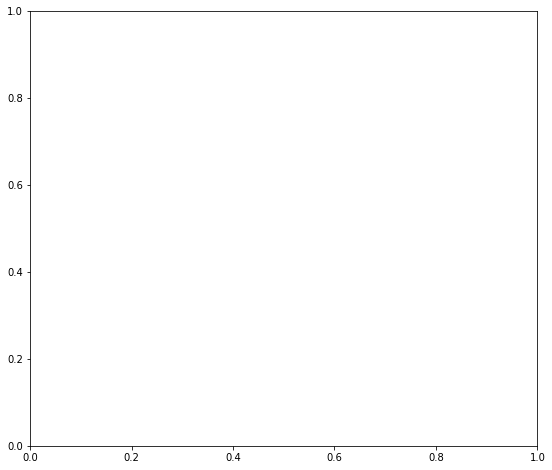

In [23]:
# Compose and test RGB histograms (rgb_hist)
plt.figure(2)
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_color = 5

plt.subplot(1,2,2)
hist_rgb1 = rgb_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1, hist_rgb1.size+1)),hist_rgb1)

##### RG

In [24]:
def rg_hist(img_color_double, num_bins = 5, show_verbose = False):
  '''
  Compute the *joint* histogram for the R and G color channels in the image
  The histogram should be normalized so that sum of all values equals 1
  Assume that values in each channel vary between 0 and 255

  img_color - input color image
  num_bins - number of bins used to discretize each channel, total number of bins in the histogram should be num_bins^2

  E.g. hists[0,9] contains the number of image_color pixels such that:
      - their R values fall in bin 0
      - their G values fall in bin 9
  '''

  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  n_rows=img_color_double.shape[0]
  n_cols=img_color_double.shape[1]
  
  hists=np.zeros(num_bins*num_bins)

  for i in range(n_rows):
    for j in range(n_cols):
      #At each pixel in the image is a 1D vector of size 2,
      #where each element contain the intensity of the respective color.
      #This 1D intensity array is converted in a 1D vector of size 2
      #where at each element we have the bin location of each color.
      convert=np.array(img_color_double[i,j])/255*(num_bins-1)
      convert=np.rint(convert).astype(int)

      #The hist value in the right bin is incremented of one unit:denoting with
      #[bin_red,bin_green the converted array and using e.g. n_bin=5,
      #The first 5 bins of the hist will contain the number of pixels with the 
      #combination [0,0],[0,1],[0,2],[0,3],[0,4],  the next five bins
      #the combination [1,0],[1,1],[1,2],[1,3],[1,4] and so on up to 
      #the last bin of the histogram i.e. the 25th containing the combination [4,4]
      hists[convert[0]*num_bins+convert[1]]+=1

  #Normalize the histogram
  total_sum=sum(hists)
  for i in range(len(hists)):
    hists[i]=hists[i]/total_sum
  
  return hists

################# Do not write below this line just run #################

NameError: ignored

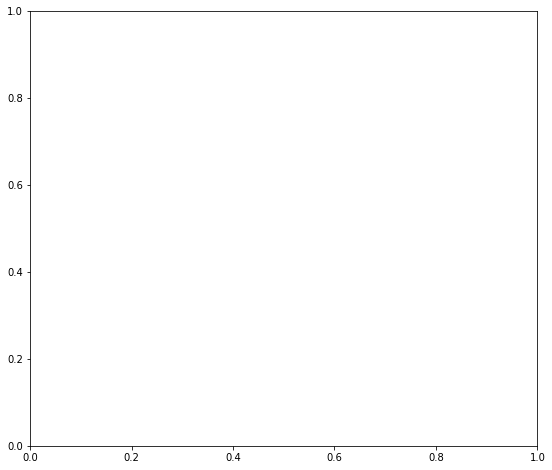

In [25]:
#Compose and test RG histograms (histogram_module.rg_hist)
plt.figure(3)
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_color = 5
plt.subplot(1,2,2)
hist_rg = rg_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1,hist_rg.size+1)),hist_rg)
plt.show()

##### DXDY

In [26]:
def gaussderiv(img, sigma):

  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  Dx, x = gaussdx(sigma)
  Gy, y = gauss(sigma)
  
  #Leveraging the separability of the gaussian and the gaussian derivative
  #we can obtain the partial derivative filtered image in this way:
  #-X-derivated image): convolve original image with the derivative
  #                      over the columns and the gaussian over the rows
  #-Y-derivated image): convolve original image with the gaussian
  #                      over the columns and the derivative over the rows
  
    
  #Reshape gaussian and derivative filters for dimensionality purposes
  Dx=Dx.reshape((1, -1))
  Gy=Gy.reshape((1, -1))

  #Produce X-derivated image
  imgDx = convolve(img, Dx)
  imgDx = convolve(imgDx, Gy.transpose())

  #Produce Y-derivated image
  imgDy = convolve(img, Gy)
  imgDy = convolve(imgDy, Dx.transpose())

  return imgDx, imgDy

In [27]:
def dxdy_hist(img_gray, num_bins = 5, show_verbose = False):
  '''
  Compute the *joint* histogram of Gaussian partial derivatives of the image in x and y direction
  Set sigma to 3.0 and cap the range of derivative values is in the range [-6, 6]
  The histogram should be normalized so that sum of all values equals 1

  img_gray - input gray value image
  num_bins - number of bins used to discretize each dimension, total number of bins in the histogram should be num_bins^2

  Note: you can use the function gaussderiv from the Filtering exercise
  '''
  
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  sigma=3
    
  smooth_imgDx,smooth_imgDy = gaussderiv(img_gray, sigma)
  
  n_rows=smooth_imgDx.shape[0]
  n_cols=smooth_imgDx.shape[1]
  
  #Cap values of the filtered images to -6 +6
  smooth_imgDy=np.where(smooth_imgDy>6., 6., smooth_imgDy)
  smooth_imgDy=np.where(smooth_imgDy<-6., -6., smooth_imgDy)
  smooth_imgDx=np.where(smooth_imgDx>6., 6., smooth_imgDx)
  smooth_imgDx=np.where(smooth_imgDx<-6., -6., smooth_imgDx)

  #Collect both smoothed images in a single tensor for code simplicity
  smooth_img=np.zeros((n_rows,n_cols,2))
  smooth_img[:,:,0]=smooth_imgDx
  smooth_img[:,:,1]=smooth_imgDy

  hists=np.zeros(num_bins*num_bins)

  #Build the histogram
  for i in range(n_rows):
    for j in range(n_cols):
      #At each pixel in the image is a 1D vector of size 2,
      #where each element contain the intensity of the partial derivative wrt x and y.
      #This 1D intensity array is converted in a 1D vector of size 2
      #where at each element we have the bin location of each derivative value.
      #We obtain the bin location normalizing the derivative values between [0,1]
      #And multiplying this value for the number of bins
      convert=(np.array(smooth_img[i,j])+6)/12*(num_bins-1)
      convert=np.rint(convert).astype(int)

      #The hist value in the right bin is incremented of one unit:denoting with
      #[x_derivative_bin,y_derivative_bin] the converted array and using e.g. n_bin=5,
      #The first 5 bins of the hist will contain the number of pixels with the 
      #combination [0,0],[0,1],[0,2],[0,3],[0,4],  the next five bins
      #the combination [1,0],[1,1],[1,2],[1,3],[1,4] and so on up to 
      #the last bin of the histogram i.e. the 25th containing the combination [4,4]
      hists[convert[0]*num_bins+convert[1]]+=1

  #Normalize the histogram
  total_sum=sum(hists)
  for i in range(len(hists)):
    hists[i]=hists[i]/total_sum
  
  return hists

################# Do not write below this line just run #################

NameError: ignored

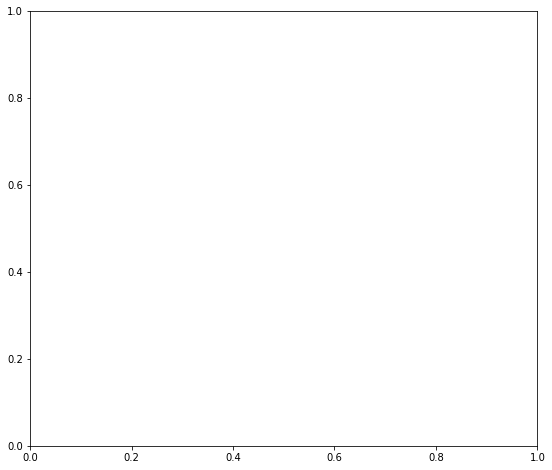

In [28]:
#Compose and test dxdy histograms (histogram_module.dxdy_hist)

plt.figure(5)
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_dxdy = 10
plt.subplot(1,2,2)
hist_dxdy = dxdy_hist(img_gray, num_bins_dxdy)
plt.bar(np.array(range(1,hist_dxdy.size+1)),hist_dxdy)
plt.show()

#### Exercise 2.c **(1 Point)**
Implement the histogram distance functions. 

In more details, implement the function *dist_intersect*:
\begin{equation}
\bigcap(Q,V)=1-\frac{1}{2}\left(
\frac{\sum_i \min(q_i,v_i)}{\sum_i q_i} +
\frac{\sum_i \min(q_i,v_i)}{\sum_i v_i}
\right)
\end{equation}

the *dist_l2* function:
\begin{equation}
d(Q,V)=\sqrt{\sum_i (q_i-v_i)^2}
\end{equation}

and the *dist_chi2*:
\begin{equation}
\chi^2(Q,V)=\sum_i \frac{(q_i-v_i)^2}{q_i + v_i}
\end{equation}


In [29]:
def dist_intersect(x,y):
  '''
  Compute the intersection distance between histograms x and y
Return 1 - hist_intersection, so smaller values correspond to more similar histograms
Check that the distance range in [0,1]
  '''
  
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  
  hist_intersection=1-0.5*(sum(np.minimum(x,y))/sum(x)+sum(np.minimum(x,y))/sum(y))

  #Check that the distance range in [0,1]
  if (0<=hist_intersection<=math.sqrt(1)): return hist_intersection
  else: 
    print("ERROR:value of intersection distance not in [0,1]")
    return
  


def dist_l2(x,y):
  '''
  Compute the L2 distance between x and y histograms
  Check that the distance range in [0,sqrt(2)]
  '''
    
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  
  l2_dist=math.sqrt(sum((x-y)**2))
  
  if (0<=l2_dist<=math.sqrt(2)): return l2_dist
  else:
    print("ERROR:value of L2 distance not in [0,sqrt(2)]") 
    return

def dist_chi2(x,y):
  '''
  Compute chi2 distance between x and y
  Check that the distance range in [0,Inf]
  Add a minimum score to each cell of the histograms (e.g. 1) to avoid division by 0
  '''

  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  #Increase all histogram bins of one unit to avoid division by 0
  x=x+1
  y=y+1
  
  chi2_dist=np.sum(((x-y)**2)/(x+y))
  if (chi2_dist>=0): return chi2_dist
  else: 
    print("ERROR:value of L2 distance not in [0,+Inf)")
    return
  

## Question 3: Object Identification **(11 Points)**

### Exercise 3 - Code **(7 Points)**

#### Exercise 3.a **(4 Points)**
Having implemented different distance functions and image histograms, you can now test how suitable
they are for retrieving images in query-by-example scenario. Implement a function find_best_match which takes a list of model images and a list of query images and for each query im-
age returns the index of closest model image. The function should take string parameters, which identify
distance function, histogram function and number of histogram bins. See comments in the beginning of
find_best_match function for more details. Additionally to the indices of the best matching images your implemen-
tation should also return a matrix which contains distances between all pairs of model and query images.
(3 points)

In [ ]:
def is_grayvalue_hist(hist_name):
  '''
  Handle function to discriminate when your input 
  function is in gray_scale or colors.
  '''
  if hist_name == 'grayvalue' or hist_name == 'dxdy':
    return True
  elif hist_name == 'rgb' or hist_name == 'rg':
    return False
  else:
    assert False, 'unknown histogram type'


def get_hist_by_name(img, num_bins_gray, hist_name):
  '''
  Handle function to get the correct historgam function 
  by his name.
  '''
  if hist_name == 'grayvalue':
    return normalized_hist(img, num_bins_gray)[0]
  elif hist_name == 'rgb':
    return rgb_hist(img, num_bins_gray)
  elif hist_name == 'rg':
    return rg_hist(img, num_bins_gray)
  elif hist_name == 'dxdy':
    return dxdy_hist(img, num_bins_gray)
  else:
    assert False, 'unknown hist type: %s'%hist_name


def get_dist_by_name(x, y, dist_name):
  '''
  Handle function to get the correct distance function 
  by his name.
  '''
  if dist_name == 'chi2':
    return dist_chi2(x,y)
  elif dist_name == 'intersect':
    return dist_intersect(x,y)
  elif dist_name == 'l2':
    return dist_l2(x,y)
  elif dist_name == 'all':
    pass
  else:
    assert False, 'unknown distance: %s'%dist_name

def read_files():
  '''
  Handle function to read query and model files
  '''
  with open('model.txt') as fp:
    model_images = fp.readlines()
  model_images = [x.strip() for x in model_images]

  with open('query.txt') as fp:
    query_images = fp.readlines()
  query_images = [x.strip() for x in query_images]

  return query_images, model_images

In [ ]:
# note: use functions 'get_dist_by_name', 'get_hist_by_name' and 'is_grayvalue_hist' to obtain 
#       handles to distance and histogram functions, and to find out whether histogram function 
#       expects grayvalue or color image

def compute_histograms(image_list, hist_type, hist_isgray, num_bins):
    '''
    this function returns a list containing the histograms for
    the list of images given as input.
    '''
    #WRITING CODE
    image_hist = []
    
    if hist_isgray==True:
        #make the images  from the image list gray
        for i in range(len(image_list)):
            image_list[i] = rgb2gray(image_list[i].astype('double'))

        
    
    for i in range(len(image_list)):
        image_hist.append(get_hist_by_name(image_list[i],num_bins,hist_type)) #append to the list the 
                                                                              #"hist_type" histogram
    return image_hist


import numpy as np
def find_best_match(model_images, query_images, dist_type, hist_type, num_bins):
    '''
    Function to find the best match for each image in the 
    query folder.
    Input:
    model_images: list of strings with the path of model images.
    query_images: list of strings with the path of query images.
    dist_type:    a string to represent the name of the distance you want to 
                  use. Should be one among "l2", "intersect", "chi2".
    hist_type:    a string to represent the name of the histogram you want to 
                  use. Should be one among "grayvalue", "rgb", "rg", "dxdy".
  
    Output:
    best_match:   list containing in each position the index of the retrieved
                  best matching image.
    D:            Matrix with |model_images| rows and |query_images| columns
                  containing the scores of each matching.
    '''
    #WRITING CODE 
    best_match=[]
    
    best_dist=10^5
    index=-1
    
    D=np.zeros(shape=(len(model_images),len(query_images))) #return np array representing D=len(model)xlen(query) 
                                                            #(filled with zeros)
    img_list1,img_list2=[],[]
    for i in range(len(model_images)):                                   #create 2 lists of images(one for query one, for
        arr1=np.array(Image.open(model_images[i]),dtype=float)           #model) to pass to the "compute_histogram" func
        img_list1.append(arr1.astype('double'))
    for j in range(len(query_images)):
        arr2=np.array(Image.open(query_images[j]),dtype=float)
        img_list2.append(arr2.astype('double'))

    
    a=compute_histograms(img_list2,hist_type,is_grayvalue_hist(hist_type),num_bins) #here we evaluate the histograms
    b=compute_histograms(img_list1,hist_type,is_grayvalue_hist(hist_type),num_bins) #for both query and model images
    
    for i in range(len(query_images)):
        best_dist=10^5
        for j in range(len(model_images)):
            dist_value=get_dist_by_name(a[i],b[j],dist_type) 
            D[j][i]=dist_value                               #Assign values to the matrix D
            #print(dist_value)
            if dist_value<best_dist:
                best_dist=dist_value                         #update with the lowest "up to now" value of the distance
                index=j                                      #save the index to pass if the condition is met
        best_match.append(index)                             #pass to the list the index of the best match

    return np.asarray(best_match), D

################# Do not write below this line just run #################

In [ ]:
query_images, model_images = read_files()

dist_type = 'chi2'
hist_type = 'grayvalue'
num_bins = 10

[best_match, D] = find_best_match(model_images, query_images, dist_type, hist_type, num_bins)

print("Indexes of correct retrieved images is:\n ", *np.where(best_match == np.arange(len(query_images))))
print("The Recognition rate is", sum(best_match == np.arange(len(query_images)))/len(query_images))

#### Exercise 3.b **(3 Points)**
Implement a function **show_neighbors** which takes a list of model images and a list of
query images and for each query image visualizes several model images which are closest to the query image
according to the specified distance metric. Use the function find best match in your implementation. See the Figure below for example of the output.

![](https://drive.google.com/uc?export=view&id=1qlPbNzh92u9EU4kzNMbHg0uRgSk4AnRO)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def show_neighbors(model_images, query_images, dist_type, hist_type, num_bins):
    
    '''
    For each image file from 'query_images' find and visualize the 5 nearest images from 'model_image'.

    Note: use the previously implemented function 'find_best_match'
    Note: use subplot command to show all the images in the same Python figure, one row per query image
  
    '''
  
    #WRITING CODE
    best_match, D = find_best_match(model_images, query_images, dist_type, hist_type, num_bins)  
    #FIND WHAT IMGS TO PLOT                                                                    
    inds=[] #will use this list to store the indices
    #need to pick the 5 lower values from each row of D and retrieve their indices 
    #so that we can use the indices to know which image we should plot
    for i in range(len(query_images)):
                                                        #finds the 5 lowest values' index for each column
        inds.append(np.argpartition(D[:,i], 5)[:5])     #inds is now a list containing the index of the imgs to plot
        
    
    #PLOT THE IMAGES AS REQUESTED
    
    fig,axs=plt.subplots(len(query_images),6)


    for j in range(len(query_images)):
        axs[j,0].imshow(np.array(Image.open(query_images[j])))
        for i in range(1,6):
            a=inds[j][i-1]
            axs[j,i].imshow(np.array(Image.open(model_images[a])))

    for ax in axs.flat:
        ax.label_outer()
   
    return #la funzione non deve ritornare niente

################# Do not write below this line just run #################

In [ ]:
## visualize nearest neighbors
query_images_vis = [query_images[i] for i in np.array([0,4,9])]
show_neighbors(model_images, query_images_vis, dist_type, hist_type, num_bins)

#### Metric
 Use the function find best match to compute recognition rate for different combinations of distance and
histogram functions. The recognition rate is given by a ratio between number of correct matches and total
number of query images.


################# Do not write below this line just run #################

In [ ]:
num_correct = sum(best_match == range(len(query_images)))
print('number of correct matches: %d (%f)\n'% (num_correct, 1.0 * num_correct / len(query_images)))

### Report **(4 Points)**

Experiment with different functions and numbers of histogram bins, try to find
combination that works best. **Submit the summary of your experiments in a report as part of your solution.**


**Write your Report here**

Some simulations with different types of metric, histograms and number of bins were run in order to find what's the most accurate combination of them, we report the results in the following table.\
*Note that the actual number of bins we pass is:

1. $N_{bins}^3$ for the rgb histogram
1. $N_{bins}^2$ for rg and dxdy histograms
1. $N_{bins}$ for the grayvalue histogram

|Metric |Hist    |Number of Bins  |Recognition rate|
|---|---|---|---|
|intersect  |rgb      |20  |0.89|
|intersect  |rgb      |10  |0.89|
|intersect  |rgb      | 5  |0.79|
|intersect  |rg       |20  |0.85|
|intersect  |rg       |10  |0.80|
|intersect  |rg       | 5  |0.69|
|intersect  |dxdy     |20  |0.65|
|intersect  |dxdy     |10  |0.60|
|intersect  |dxdy     | 5  |0.60|
|intersect  |grayvalue|20  |0.52|
|intersect  |grayvalue|10  |0.49|
|intersect  |grayvalue| 5  |0.39|
||||
|l2         |rgb      |20  |0.57|
|l2         |rgb      |10  |0.62|
|l2         |rgb      |5   |0.66|
|l2         |rg       |20  |0.60|
|l2         |rg       |10  |0.60|
|l2         |rg       |5   |0.62|
|l2         |dxdy     |20  |0.44|
|l2         |dxdy     |10  |0.46|
|l2         |dxdy     |5   |0.44|
|l2         |grayvalue|20  |0.38|
|l2         |grayvalue|10  |0.44|
|l2         |grayvalue|5   |0.35|
||||
|chi2       |rgb      |20  |   0.60|
|chi2       |rgb      |10  |   0.66|
|chi2       |rgb      | 5  |   0.69|
|chi2       |rg       |20  |   0.61|
|chi2       |rg       |10  |   0.63|
|chi2       |rg       | 5  |   0.65|
|chi2       |dxdy     |20  |   0.44|
|chi2       |dxdy     |10  |   0.49|
|chi2       |dxdy     | 5  |   0.45|
|chi2       |grayvalue|20  |   0.39|
|chi2       |grayvalue|10  |   0.46|
|chi2       |grayvalue| 5  |   0.35|


We can notice that, usually, by reducing the number of bins we get worse results for almost every kind of distance and histogram. 
We can also notice that the intersection is the best performing distance out of the 3 while $\chi^2$ and $l_2$ have very similar performances.

## Question 4: [K-Means]((https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)) 
###(Bonus question for **5 Points**, not compulsory)

Recolor the original images and Query images by using Kmeans. And find the best matches between the two.

There are several way to preprocess an image, and in this exrcise you will work with "recoloration". Given an image, you will use a Kmeans model to transform it, and use the same model to transform the images that belongs to the model folder, then repeat the previous to exercises to extract the RGB hist and find the best match. We'll provide the method to fit a KMeans model on an image and to transform an image given a KMeans model. You should then use these functions, applying them on the query images (to retrieve recolored images and a KMeans_model for each query image) and on the model images. Pay attention on the fact that you should use a model fitted on a query image on the whole model folder to have coherent results.

In the following example, the KMeans model has been fitted on three different images: [Row 1] then these models are used to transform original images to recolored images [Row 2:4]

![](https://drive.google.com/uc?export=view&id=1m0Wu2n12BflIwMHL1g3LUxHurotxrPWr)

#### Exercise 4 - Code **(3 Points)**


In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from tqdm import tqdm

def fitting_kmeans(query, K):
  '''
  fit a Kmeans model on 1 image.
  return the recolored image and the KM model
  '''
  shape_ = query.shape

  kmeans = KMeans(K)
  data = query.reshape(-1, 3)
  kmeans.fit(data)
  query_recolored = kmeans.cluster_centers_[kmeans.predict(data)]

  return query_recolored.reshape(shape_), kmeans


def apply_kmeans(km_model, model_image):
  '''
  transform with a Kmeans model 1 image.
  return the recolored image.
  '''

  shape_ = model_image.shape
  data = model_image.reshape(-1, 3)
  img_recolored = km_model.cluster_centers_[km_model.predict(data)]

  return img_recolored.reshape(shape_)

In [ ]:
def compute_KM_histograms(image_list, num_bins=10):
  '''
  Function to compute histograms of a list of images.
  Leverage the "rgb_hist" function previously coded.
  '''
  
  return [rgb_hist(np.array(img), num_bins) for img in image_list]

In [ ]:
def compute_KMeans(model_list, query_list, K):
  '''
  Function to compute the recolored images from both query and 
  model lists. You should:
    1. Apply the fitting method to queries retrieving the list of recolored
       queries and KMeans models.
    2. Apply the transforming method on all the images in the model folder
       for each KMeans you fitted in the previous step.
    3. Return the 2 lists of recolored images.
  '''
  #Store query recolored images
  query_recolored_imgs = [] 
  #Store kmean models fitted on query images
  query_km_models = [] 
  #Store model recolored images (to preserve coherency, at first element of the
  #list we have a list of model recolored images through 1st kmean model, at 
  #second element of the listwe have a list of model recolored images through
  # 2nd kmean model and so on. model_recolored_imgs is a list of list)
  model_recolored_imgs = [] 

  print("Fitting and extracting kmean models from query images...")
  for img in tqdm(query_images):
    #Open each query image
    query = np.array(Image.open(img),dtype=float).astype("double") # apro l'immagine
    #Fit the kmean model  
    query_recolored, km_model = fitting_kmeans(query, K) 
    #Store recolored query image and kmean model
    query_recolored_imgs.append(query_recolored)
    query_km_models.append(km_model) #inserisco nel vettore dei metodi


  print("Applying kmean models on model images...")
  #For each kmean model we initialize a list l[] on which we store model images 
  #predicted with that model. Each l[] list is than appended to the 
  #model_recolored_imgs list of lists.
  for method in tqdm(query_km_models):   
    l = []   
    for model in model_list:                                    
      model_image = np.array(Image.open(model),dtype=float).astype("double")
      output_image = apply_kmeans(method, model_image)
      l.append(output_image)
    model_recolored_imgs.append(l)
  
  return query_recolored_imgs, model_recolored_imgs

def compute_recolored_hists(query_recolored, model_recolored):
  '''
  Function to compute the histograms of lists of images.
  Use the compute_KM_histograms function.
  '''

  query_hists=[]
  model_hists=[]

  query_hists=compute_KM_histograms(query_recolored, num_bins=10)
  
  #Once again, model_hists is a list of lists at first element of the
  #list we have a list of histograms for the model recolored images through 1st 
  #kmean model, at second element of the list we have a list of histograms
  #for the model recolored images through 2nd kmean model and so on.
  print("Computing recolored images histograms...")
  for i in tqdm(range(len(query_hists))):
    single_model_hists=compute_KM_histograms(model_recolored[i], num_bins=10)
    model_hists.append(single_model_hists)

  return query_hists, model_hists


def compute_matching(q_hists, m_hists, dist_type):
  '''
  Function to compute the scores among several histograms.
  Similarly to find_best_match function you have previously defined,
  this function will return the best_match list.

  EXTRA: add the 'all' dist_type wich compute the scores for all 3 
  kind of distances, exploiting the strength of modulation!
  '''
  index=-1
  if dist_type!="all":
      best_match=[]
      print("Computing best matches...")
      for i in tqdm(range(len(q_hists))):
          best_dist=3
          for j in range(len(m_hists)):
              #For a particular distance type, return the distance value and 
              #store the index of the model image which best 
              #match a particular query image into best_match[]
              dist_value=get_dist_by_name(q_hists[i],m_hists[i][j],dist_type) 
              if dist_value<best_dist:
                  best_dist=dist_value                         #update with the lowest "up to now" value of the distance
                  index=j                                      #save the index to pass if the condition is met
          best_match.append(index) 
      return best_match

  else:
      best_match=[[],[],[]]
      dists=["chi2","l2","intersect"]
      print("Computing best matches...")
      for k in tqdm(range(len(dists))):
          for i in range(len(q_hists)):
              best_dist=3
              #For a each distance type, return the distance value and 
              #store the index of the model image which best 
              #match a particular query image into best_match[] for each
              #distance type        
              for j in range(len(m_hists)):
                  dist_value=get_dist_by_name(q_hists[i],m_hists[i][j],dists[k]) 
                  if dist_value<best_dist:
                      best_dist=dist_value                         #update with the lowest "up to now" value of the distance
                      index=j                                      #save the index to pass if the condition is met
              best_match[k].append(index)
      
      return best_match

def print_corrects_KM(match, tot_q_images, dist_type, K):
  '''
  Function to print the results.
  Input:
    match: the best_match results
    tot_images: len(model_images)
    dist_type: among 'l2', 'intersect' and 'chi2' (EXTRA: 'all')
    K: K-Means parameter
  
  last three args should be expicitly printed by this function.
  
  Example of Output:

  Settings: K=30, dist=chi2
  Results: Number of correct matches: 58/89 (65.17%)
  '''
  #Compute accuracy score in percentage
  percentage = round(match / tot_q_images * 100,2)
  #Print the results
  print('Settings: K=', K, ', dist=', dist_type, \
        '\nResults: Number of correct matches: ', match, '/', tot_q_images, \
        '(', percentage, '%)', sep='')
  

def KM_matching(model_imgs, query_imgs, dist_type, K):
  '''
  Use all the functions you have just defined to print the results.
  '''
  tot_q_images = len(model_images)
  query_recolored_imgs, model_recolored_imgs = compute_KMeans(model_imgs, query_imgs, K)
  q_hists, m_hists = compute_recolored_hists(query_recolored_imgs, model_recolored_imgs)
  best_match = compute_matching(q_hists, m_hists, dist_type)
  
  #If we called dist_type="all", best_match will contain a list of indexes for each of the 3 
  #distance types. We print the results for each of the 3 methods
  if len(best_match)==3:
    match=[]
    dist_names=["chi2","intersect","l2"]
    for i in range(len(best_match)):
        match.append(sum(np.asarray(best_match[i]) == range(len(query_images))))
        print()
        print_corrects_KM(match[i], tot_q_images, dist_type=dist_names[i], K=K)
        
    return
    
  else:
    match = sum(np.asarray(best_match) == range(len(query_images)))
    print()
    print_corrects_KM(match, tot_q_images, dist_type, K)
    return 

################# Do not write below this line just run #################

In [ ]:
query_images, model_images = read_files()

K = 70
dist_type = 'all'

KM_matching(model_images, query_images, dist_type, K)

#### Report **(2 Points)**

Experiment with different functions and numbers of clusters, try to find
combination that works best. **Submit the summary of your experiments in a report as part of your solution.**

From the KM_matching function we reached the following result for some K values:

|  | Number of Clusters | Metric(Distance Metric) | Accuracy |
|---|---|---|---|
| 1 | 70 | l2 | 78.65% |
| 2 | 50 | l2 | 78.65% |
| 3 | 30 | l2 | 74.16% |
| 4 | 20 | l2 | 68.54% |
| 5 | 50 | Chi2 | 61.80% |
| 6 | 30 | Chi2 | 60.67% |
| 7 | 20 | Chi2 | 59.55% |
| 8 | 70 | Chi2 | 57.30% |
| 9 | 50 | Intersect | 56.18% |
| 10 | 30 | Intersect | 56.18% |
| 11 | 20 | Intersect | 56.18% |
| 12 | 70 | Intersect | 52.81% |
| 13 | 5 | Chi2 | 49.44%|
| 14 | 5 | l2 | 49.44%|
| 15 | 5 | Intersect | 49.44% |

As we can see in the previous table the 70 clusters model, with also 50 clusters model, using the "l2" distance function, has the best accuracy found (78.65%). Other clusters models like 30 clusters or 20 clusters using the same distance function have the nearest accuracy equal, respectevely, to 74.16% and 68.54%. For the same number of clusters we notice that with "Chi2" distance function we obtain a lesser accuracy, like 61.80% for the 50 cluster model. The worst distance function to use, between the three used, is "Intersect" distance function that made the 50 clusters model has an accuracy only equal to 56.18%. For each distance function the 5 clusters method is the worst, with an accuracy equal to 49.44%. So the most accurate model we have found are 70 or 50 clusters models both with the "l2" distance funcion.